# Map Consistent Probability Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
init_pos = np.array([0,0,np.pi/4])
dest = np.array([4,4,np.pi/4])
points_data = np.tile(init_pos,(500,1))
params = (0.02, 0.02, 0.02, 0.02)

## Main Function

In [3]:
def get_new_points(original_pos, pos_delta, params, ideal_pos, check_map = False):
    trans = np.sqrt(pos_delta[0]**2 + pos_delta[1]**2)
    rot1 = np.arctan2(pos_delta[1], pos_delta[0]) - ideal_pos[2]
    rot2 = pos_delta[2]-rot1
    alpha1, alpha2, alpha3, alpha4 = params
    # print(alpha1, alpha2, alpha3, alpha4)
    stdv1 = alpha1*np.abs(rot1) + alpha2*trans
    stdv2 = alpha3*trans + alpha4*(np.abs(rot1)+np.abs(rot2))
    stdv3 = alpha1*np.abs(rot2) + alpha2*trans
    stdv = [stdv1, stdv2, stdv3]
    delta = [rot1, trans, rot2]
    result = randomly_sample(original_pos, stdv, delta)
    if check_map:
        while True:
            check_result = np.apply_along_axis(map_check,arr=result,axis=1)
            if np.any(check_result):
                result[np.where(check_result)] = randomly_sample(original_pos[np.where(check_result)], stdv, delta)
                # print(result[np.where(check_result)])
            else:
                break
    ideal_pos = np.array(ideal_pos + np.array(pos_delta, dtype=float))
    return result, ideal_pos

In [4]:
def randomly_sample(pos_data, stdv, delta):
    size_points = pos_data.shape[0]
    rot1, trans, rot2 = delta
    stdv1, stdv2, stdv3 = stdv
    rot1_tilta = rot1*np.ones(size_points) + np.random.normal(scale=stdv1, size=size_points)
    trans_tilta = trans*np.ones(size_points) + np.random.normal(scale=stdv2, size=size_points)
    rot2_tilta = rot2*np.ones(size_points) + np.random.normal(scale=stdv3, size=size_points)
    x_prime = pos_data[:,0] + trans_tilta*np.cos(pos_data[:,2]+rot1_tilta)
    y_prime = pos_data[:,1] + trans_tilta*np.sin(pos_data[:,2]+rot1_tilta)
    theta_prime = pos_data[:,2] + rot1_tilta + rot2_tilta
    result = np.stack((x_prime,y_prime,theta_prime), axis = 1)
    return result

In [5]:
def map_check(point):
    if point[0]>=3 and point[0]<=5 and point[1]>=3.8 and point[1]<=4.2:
        return True
    else:
        return False

## Result Figure

In [6]:
result1 = get_new_points(points_data, dest-init_pos, params, init_pos)
result2 = get_new_points(points_data, dest-init_pos, params, init_pos, check_map=True)

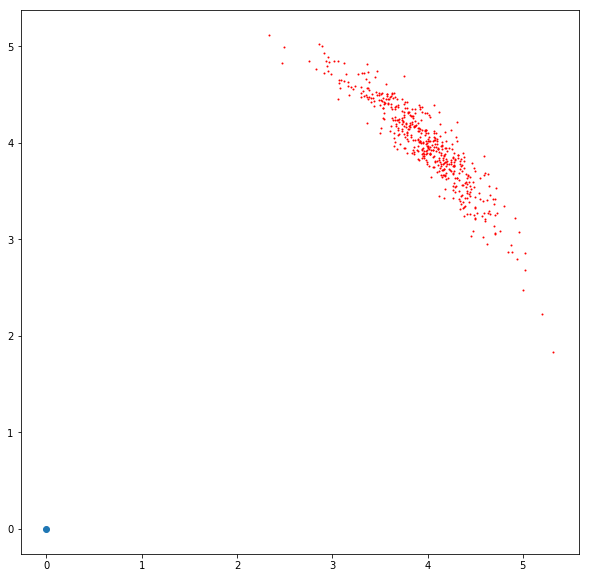

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(init_pos[0], init_pos[1])
plt.scatter(result1[0][:,0], result1[0][:,1], c='red', s=1)
plt.show()

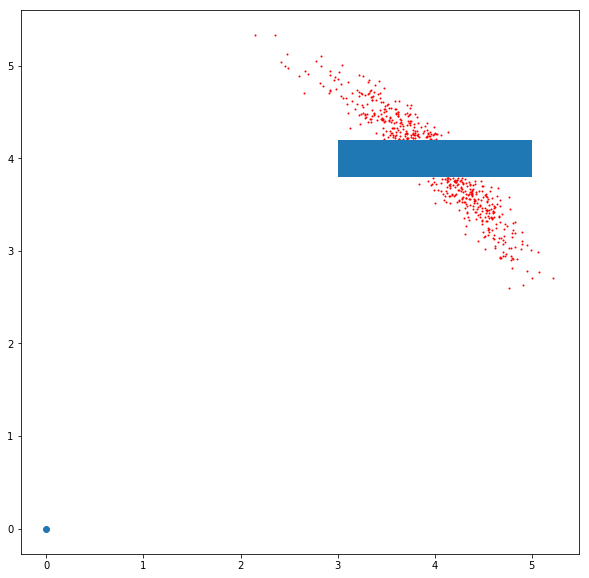

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(init_pos[0], init_pos[1])
plt.scatter(result2[0][:,0], result2[0][:,1], c='red', s=1)
ax1 = plt.gca()
ax1.add_patch(
    patches.Rectangle(
        (3, 3.8),   # (x,y)
        2,          # width
        0.4,          # height
    )
)
plt.show()